In [58]:
import yfinance as yf
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import cvxpy as cp

In [59]:
stock_symbols = [
    "RIVN",  # Rivian Automotive
    "TSLA",  # Tesla
    "NIO",   # Nio Inc ADR
    "XPEV",  # Xpeng Inc ADR
    "EVGO",  # Evgo Inc
    "LI",    # Li Auto Inc ADR
    "INDI",  # Indie Semiconductor Inc Class A
    "CHPT",  # Chargepoint Holdings Inc Class A
    "LCID",  # Lucid Group Inc
    "LAZR"   # Luminar Technologies Inc Class A
]
data = yf.download(stock_symbols, start="2021-11-18", end="2024-11-18")["Close"]
data

[*********************100%***********************]  10 of 10 completed


Ticker,CHPT,EVGO,INDI,LAZR,LCID,LI,NIO,RIVN,TSLA,XPEV
Date,,,,,,,,,,
2021-11-18 00:00:00+00:00,26.129999,14.58,15.60,290.700012,47.049999,30.980000,38.410000,123.379997,365.459991,47.270000
2021-11-19 00:00:00+00:00,26.900000,14.72,15.37,287.549988,55.209999,30.600000,38.660000,128.600006,379.019989,46.889999
2021-11-22 00:00:00+00:00,27.299999,13.73,14.76,277.200012,51.119999,31.190001,41.490002,118.110001,385.623322,47.389999
2021-11-23 00:00:00+00:00,25.850000,13.67,13.41,270.000000,52.439999,31.740000,42.040001,119.849998,369.676666,51.299999
2021-11-24 00:00:00+00:00,26.170000,13.57,13.30,269.700012,52.570000,32.619999,41.419998,114.849998,372.000000,54.369999
...,...,...,...,...,...,...,...,...,...,...
2024-11-11 00:00:00+00:00,1.210000,5.40,5.08,15.300000,2.340000,24.330000,5.060000,11.040000,350.000000,15.300000
2024-11-12 00:00:00+00:00,1.130000,4.89,4.75,16.950001,2.140000,22.610001,4.580000,10.580000,328.489990,13.670000
2024-11-13 00:00:00+00:00,1.100000,5.20,4.73,15.750000,2.180000,22.350000,4.610000,12.030000,330.239990,13.350000


In [60]:
data.shift(1)

Ticker,CHPT,EVGO,INDI,LAZR,LCID,LI,NIO,RIVN,TSLA,XPEV
Date,,,,,,,,,,
2021-11-18 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-19 00:00:00+00:00,26.129999,14.58,15.60,290.700012,47.049999,30.980000,38.410000,123.379997,365.459991,47.270000
2021-11-22 00:00:00+00:00,26.900000,14.72,15.37,287.549988,55.209999,30.600000,38.660000,128.600006,379.019989,46.889999
2021-11-23 00:00:00+00:00,27.299999,13.73,14.76,277.200012,51.119999,31.190001,41.490002,118.110001,385.623322,47.389999
2021-11-24 00:00:00+00:00,25.850000,13.67,13.41,270.000000,52.439999,31.740000,42.040001,119.849998,369.676666,51.299999
...,...,...,...,...,...,...,...,...,...,...
2024-11-11 00:00:00+00:00,1.130000,5.54,5.48,13.185000,2.210000,23.650000,5.090000,10.590000,321.220001,14.490000
2024-11-12 00:00:00+00:00,1.210000,5.40,5.08,15.300000,2.340000,24.330000,5.060000,11.040000,350.000000,15.300000
2024-11-13 00:00:00+00:00,1.130000,4.89,4.75,16.950001,2.140000,22.610001,4.580000,10.580000,328.489990,13.670000


In [61]:
log_returns = np.log(data/data.shift(1)).dropna()
expected_returns = log_returns.mean()*(len(data)/3)
covariance_matrix = log_returns.cov()*(len(data)/3)
expected_returns

Ticker
CHPT   -1.051315
EVGO   -0.353231
INDI   -0.417929
LAZR   -0.996138
LCID   -1.052423
LI     -0.103503
NIO    -0.716440
RIVN   -0.836678
TSLA   -0.043587
XPEV   -0.437624
dtype: float64

In [62]:
covariance_matrix

Ticker,CHPT,EVGO,INDI,LAZR,LCID,LI,NIO,RIVN,TSLA,XPEV
Ticker,,,,,,,,,,
CHPT,0.713670,0.433492,0.257334,0.401457,0.372576,0.182935,0.293439,0.341260,0.214666,0.256059
EVGO,0.433492,0.769029,0.219962,0.323281,0.321469,0.165172,0.263888,0.310439,0.176577,0.208320
INDI,0.257334,0.219962,0.537458,0.274616,0.221649,0.130691,0.215764,0.260288,0.186470,0.214493
LAZR,0.401457,0.323281,0.274616,0.872302,0.345782,0.185021,0.321537,0.348679,0.242315,0.282970
LCID,0.372576,0.321469,0.221649,0.345782,0.650951,0.180482,0.319038,0.420991,0.240722,0.294325
LI,0.182935,0.165172,0.130691,0.185021,0.180482,0.498803,0.373528,0.201310,0.143722,0.432318
NIO,0.293439,0.263888,0.215764,0.321537,0.319038,0.373528,0.595973,0.333130,0.218318,0.525247
RIVN,0.341260,0.310439,0.260288,0.348679,0.420991,0.201310,0.333130,0.648036,0.248316,0.314725
TSLA,0.214666,0.176577,0.186470,0.242315,0.240722,0.143722,0.218318,0.248316,0.375821,0.195599


<Axes: xlabel='Volatility', ylabel='Return'>

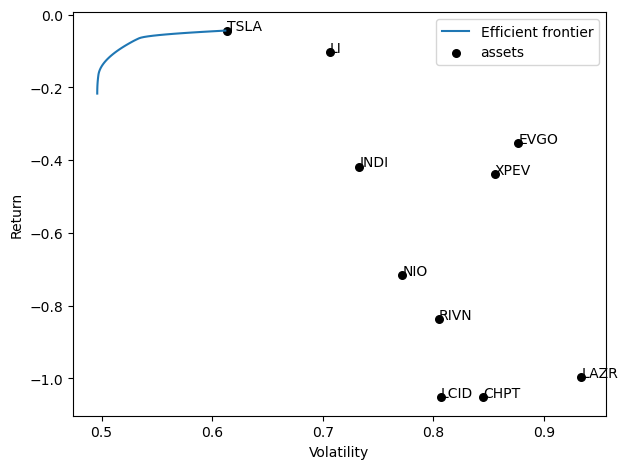

In [63]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.plotting import plot_efficient_frontier 
#if error importing, go to ptpfopt.plotting package and delete line with plt.style.use("seaborn-deep")
plot_efficient_frontier(EfficientFrontier(expected_returns,covariance_matrix,), show_tickers = True)

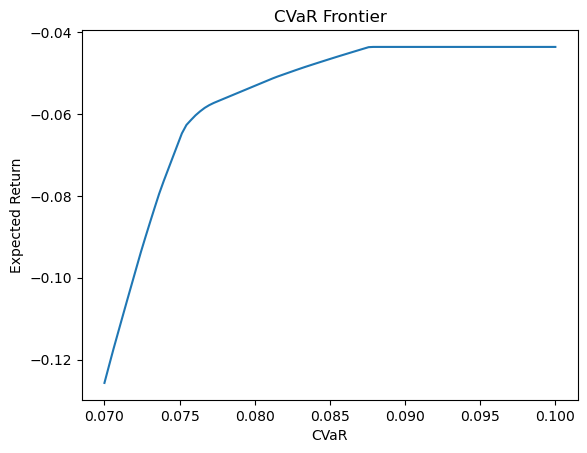

In [64]:
from pypfopt import EfficientCVaR
cvar_range = np.linspace(0.07, 0.1, 100)
cvar_vals = []
returns_vals = []

for cvar_target in cvar_range:
    ef = EfficientCVaR(expected_returns, log_returns)
    weights = ef.efficient_risk(cvar_target)
    ret = ef.portfolio_performance(verbose=False)[0]
    cvar_vals.append(cvar_target)
    returns_vals.append(ret)


plt.plot(cvar_vals, returns_vals)
plt.xlabel("CVaR")
plt.ylabel("Expected Return")
plt.title("CVaR Frontier")
plt.show()

In [65]:
from typing import Optional
from pydantic import BaseModel, Field

class evasion_dector(BaseModel):

    """You are determining the evasiveness of an earning calls report. In order to do so consider the following 5 categories: Gen Knowledge, shareholder
    value, third person pronouns, extreme positive words, and anxiety words. You are an expert in evasive language. and interpreting earning call reports.
     When analyzing transcript only pay attention to what the ceo or cfo says. """
    
    gen_knowledge: Optional[int] = Field(default=0, 
        description=("Score from 0-10 representing number of general knowledge terms relative to length of transcript. "
            "Make sure the scale is also relative to how much other earning calls use. General knowledge terms are "
            "words/phrases that imply that the audience should know something without going into detail. Examples of such words are:"
            " everybody knows, everybody well knows, everybody long knows, everybody would agree,"
            "everyone knows, everyone well knows, everyone long knows, everyone would agree, others"
            "know, others well know, others long know, others would agree, they know, they well know. "
            " 0 represents nearly none found whereas 10 is a ton found"))
    shareholder_value: Optional[int] = Field(default=0, 
        description=("Score from 0-10 representing number of shareholder value terms relative to length of transcript. "
            "Make sure the scale is also relative to how much other earning calls use. Shareholder value terms are "
            "words/phrases that imply shareholder value. Examples of such phrases are:"
            "shareholder value, shareholder welfare, shareholder well-being, value for our shareholders, "
            "value for shareholders, stockholder value, stockholder welfare, stockholder well-being, value \n"
            " 0 represents a ton were found whereas 10 is nearly none were found"))
    third_person: Optional[int] = Field(default=0, 
        description=("Score from 0-10 representing number of third person plural terms relative to length of transcript. "
            "Make sure the scale is also relative to how much other earning calls use. Third person terms terms are "
            "pronoun referring to a group of people or things. Examples of such words are:"
            "they, their they'd"
            " 0 represents nearly none found whereas 10 is a ton found"))
    pos_extreme: Optional[int] = Field(default=0, 
        description=("Score from 0-10 representing number of postive extreme were used terms relative to length of transcript. "
            "Make sure the scale is also relative to how much other earning calls use. Postive extreme terms are "
            "words/phrases that are exremely positive, not mildly postive. Examples of such words are:"
            "amazing, A-one, astonish*, awe-inspiring, awesome, awful, bang-up, best, bless, brilliant,"
            "by all odds, careful, challenge, cherish, confidence, confident, confidently, convinc,"
            "crack, cracking, dandy, deadly, definite, definitely, delectabl*, delicious, deligh, deucedly"
            " 0 represents nearly none found whereas 10 is a ton found"))
    anxiety: Optional[int] = Field(default=0, 
        description=("Score from 0-10 representing number of anxiety were used terms relative to length of transcript. "
            "Make sure the scale is also relative to how much other earning calls use. Anxiety terms are "
            "words/phrases that eleicit a sense of anxiety. Examples of such words are:"
            "anxious, worried, fearful, nervous "
            " 0 represents a ton were found whereas 10 is nearly none were found"))

In [66]:
from mistralai import Mistral
#replace with real api key for mistral
api_key = "G29xbJYu3dowD0cPXukS5QOAZcvKJi37"
client = Mistral(api_key=api_key)

In [67]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_mistralai import ChatMistralAI
prompt = ChatPromptTemplate.from_messages(
    [
        """You are determining the evasiveness of an earning calls report. In order to do so consider the following 5 categories: Gen Knowledge, shareholder
    value, third person pronouns, extreme positive words, and anxiety words. You are an expert in evasive language and interpreting earning call reports """,
        ("human", "{text}"),
    ]
)
llm = ChatMistralAI(model="mistral-large-latest", temperature=0, api_key = api_key)
runnable = prompt | llm.with_structured_output(schema=evasion_dector)

In [68]:
prior = {}
raw_data = {}
for x in stock_symbols:
    with open(f"transcripts/{x.lower()}.txt", 'r') as file:
        transcript = file.read().replace('\n', '')
    cur = runnable.invoke({"text": transcript})
    prior[x] = 1 - (cur.gen_knowledge + cur.shareholder_value + cur.third_person + cur.pos_extreme + cur.anxiety)/50
    raw_data[x] = cur
    time.sleep(5)
prior

{'RIVN': 0.45999999999999996,
 'TSLA': 0.42000000000000004,
 'NIO': 1.0,
 'XPEV': 1.0,
 'EVGO': 0.48,
 'LI': 1.0,
 'INDI': 1.0,
 'CHPT': 1.0,
 'LCID': 0.48,
 'LAZR': 1.0}

In [69]:
adjusted_prior = (pd.Series(prior) - 0.3)*0.4 + expected_returns

<Axes: xlabel='Volatility', ylabel='Return'>

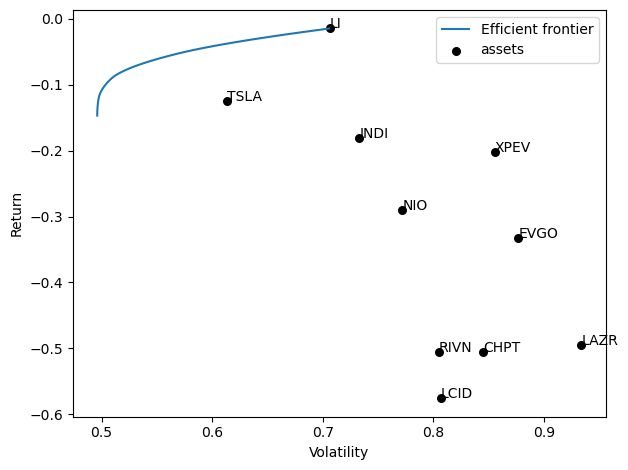

In [70]:
from pypfopt.black_litterman import BlackLittermanModel

bl = BlackLittermanModel(covariance_matrix, absolute_views=adjusted_prior, pi="equal")
rets = bl.bl_returns()

bl_range = np.linspace(0.5, 2, 100)
bl_vals = []
returns_vals = []

ef = EfficientFrontier(rets, covariance_matrix)
plot_efficient_frontier(ef, show_tickers = True, )